In [1]:
import os
os.listdir("pumbed-rct/PubMed_20k_RCT")

['dev.txt', 'test.txt', 'train.txt']

Creating the data directory of RCT numbers replaced with @ sign

In [2]:
data_dir = "pumbed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"
file_names = os.listdir(data_dir)
file_names

['dev.txt', 'test.txt', 'train.txt']

Let's create a function to read the lines of a document

In [3]:
def get_lines(filename):
    """
    Reads filename (a text file name) and return the lines of text as list
    :param filename: a string containing the target filepath
    :return: a list of a strings with one string per line from the target file name
    """
    with open(filename, "r") as f:
        return f.readlines()

Now let's read the training lines

In [4]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Writing a preprocessing function to structure our data for modelling

In [5]:
def preprocess_text_line_number(filename):
    """
    Return a list of dictionaries of abstract line data
    Takes in filename, reads its contents, and sort through each line, extracting things like target label, the text of the sentence,
    how many sentence are in the current abstract and what sentence number the target line is.
    :param filename: String holds the file path of the text file
    :return: dictionaries hold the target, text of the sentence, how many sentence in the list, sentence number
    """
    input_lines = get_lines(filename)  #get all lines from the file name
    abstract_lines = ""  # Create an empty abstract
    abstract_samples = []  # Create an empty list of abstract

    # Loop through each line in target file
    for line in input_lines:
        if line.startswith("###"):  #Check to see if it is an ID line
            abstract_id = line
            abstract_lines = ""  # Reset the abstract string if the line is an ID line
        elif line.isspace():  # Check to see if the line is a new line
            abstract_lines_split = abstract_lines.splitlines()  # split abstract into seperated lines

            # Iterate through each line in a single abstract
            for abstract_line_number, abstract_line in enumerate(abstract_lines_split):
                line_data = {}  # create am empty dictionary for each line
                target_text_split = abstract_line.split("\t")  #Split target label from text
                line_data["target"] = target_text_split[0]  #Getting the target label
                line_data["text"] = target_text_split[1].lower()  #Getting the text of the sentence and lower it
                line_data["line_number"] = abstract_line_number  #What number line does the line appear in the abstract?
                line_data["total_lines"] = len(abstract_lines_split) - 1
                abstract_samples.append(line_data)
        else:  # if the above conditions are not fulfilled, the line contains a labeled sentence
            abstract_lines += line
    return abstract_samples



Getting the data from file and preprocess it

In [6]:
training_path = "pumbed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt"
validation_path = "pumbed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt"
testing_path = "pumbed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt"
train_samples = preprocess_text_line_number(training_path)
validation_samples = preprocess_text_line_number(validation_path)
test_sample = preprocess_text_line_number(testing_path)

In [7]:
len(train_samples), len(validation_samples), len(test_sample)

(180040, 30212, 30135)

In [8]:
train_samples[:13]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

Now let's turn our lists into dataframe, because of our list is nested dictionaries, so it is easy to build dataframe

In [9]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
validation_df = pd.DataFrame(validation_samples)
test_df = pd.DataFrame(test_sample)

Now some checking for the dataframe

In [10]:
train_df[:13]

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


Checking the number of the labels we have in the train dataframe

In [28]:
train_df['target'].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

Let's check the length of different lines

<Axes: ylabel='Frequency'>

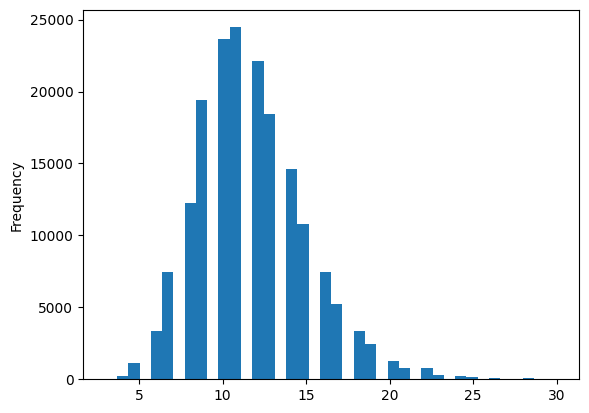

In [11]:
train_df["total_lines"].plot.hist(bins=40)

Plot the numbers of the target label of the sentence

<Axes: >

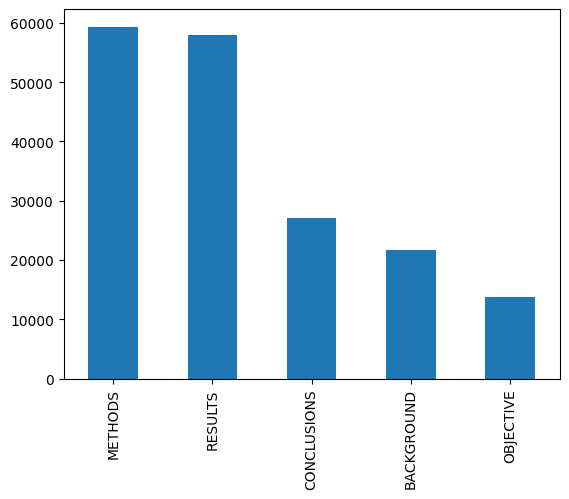

In [12]:
train_df['target'].value_counts().plot(kind="bar")

Convert abstract text lines into lists

In [13]:
train_sentences = train_df['text'].tolist()
validation_sentences = validation_df['text'].tolist()
test_sentences = test_df['target'].tolist()

train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

Make numeric labels (ML models require numeric labels), one hot encode label

In [14]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1, 1))
validation_label_one_hot = one_hot_encoder.transform(validation_df['target'].to_numpy().reshape(-1, 1))
test_label_one_hot = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1, 1))

train_labels_one_hot

C:\Users\AZK\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Transforming the train label one hot into tensors

In [15]:
import tensorflow as tf
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

Label encode labels, extract labels (target column) and encode them into integers

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_label_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
validation_label_encoded = label_encoder.transform(validation_df['target'].to_numpy())
test_label_encoded = label_encoder.transform(test_df['target'].to_numpy())

train_label_encoded[:13]

array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 1, 0])

Get class names and number of classes from label encoder instances

In [17]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

# Creating the model 0 (baseline model)

Now we are going to start with baseline model (TF-IDF multinomial naive bayes classifier

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Creating a pipeline
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences,
            y=train_label_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

Evaluate the baseline model on the validation dataset

In [69]:
model_0_evaluation = model_0.score(X=validation_sentences, y=validation_label_encoded)
model_0_evaluation

0.7218323844829869

Make predictions using our baseline model

In [20]:
baseline_preds = model_0.predict(validation_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

Now let's build a function to calculate the accuracy

In [21]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
    """
    Calculate model accuracy, precision, recall, and fi_score of a binary
    classification model
    :param y_true: The true label of your validation / test dataset
    :param y_pred: The result of your model prediction
    :return: Accuracy score, precision score, recall score, f1 score
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    model_precision, model_recall, model_f1_score, _ = precision_recall_fscore_support(y_true, y_pred,
                                                                                       average="weighted")
    model_results = {
        "accuracy": model_accuracy,
        "precision": model_precision,
        "recall": model_recall,
        "f1": model_f1_score
    }
    return model_results

In [83]:
baseline_result = calculate_results(validation_label_encoded, baseline_preds)
baseline_result

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

# Preparing our data for deep sequence model

Before we start building deeper model, we have got to create vectorization and embedding layers

In [34]:
import numpy as np
import tensorflow as tf
from keras import layers

How long is each sentence on average?

In [24]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

What is the distribution look like?

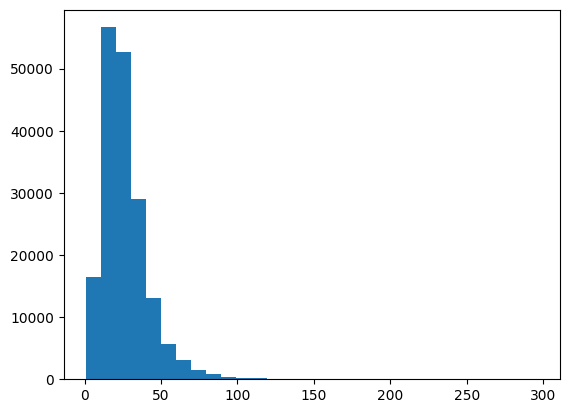

In [25]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=30)
plt.show()

From the graph above, we noted that the major of disribution is located in the half between the 0 and 50.

How long of a sentence length covers 95% of examples, to know the length which cover 95% of the sentences in training dataset

In [26]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

Maximum sequence length in the train dataset

In [27]:
max(sent_lens)

296

We want to make a layer which maps our texts from words to number

In [28]:
#How many words are in our vocab? Taken from the article of the model
max_token = 68000

In [29]:
# Create text vectorizer
from keras.layers.preprocessing.text_vectorization import TextVectorization
text_vectorizer = TextVectorization(
    max_tokens=max_token,  # Number of words in vocabulary
    output_sequence_length=output_seq_len  # Desired output length of vectorized sequences
)

In [30]:
# Adapting text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [31]:
# Text out text vectorizer on random sentences
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}\n\nLength of the sentence:\n{len(target_sentence.split())}\n\nVectorization:\n{text_vectorizer(target_sentence)}")

Text:
repositioning failed in two ( @ % ) patients .

Length of the sentence:
10

Vectorization:
[7164 1297    5   51   12    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [32]:
# How many words in our training vocabulary
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in our training vocabulary: {len(rct_20k_text_vocab)}")
print(f"The most 5 common words in our vocab: {rct_20k_text_vocab[:5]}")
print(f"The least 5 common words in our vocab: {rct_20k_text_vocab[-5:]}")

Number of words in our training vocabulary: 64841
The most 5 common words in our vocab: ['', '[UNK]', 'the', 'and', 'of']
The least 5 common words in our vocab: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [33]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [37]:
#Creating custom text embedding
token_embed = tf.keras.layers.Embedding(
    input_dim=len(rct_20k_text_vocab),  # Length of the vocabulary
    output_dim=128,  # different numbers results different number of parameters
    mask_zero=True,  # use masking to handle variable sequence length (save space)
    name="token_embedding"
)

Just remember, the large you are embedding, the more parameter your model has to train, more parameter to learn could take longer,
and smaller embedding may also not capture as much information as larger embedding because

In [39]:
# Show example embedding
print(f"Sentence before vectorization:'n{target_sentence}\n\nSentence after vectorization:\n{text_vectorizer(target_sentence)}"
      f"\n\nSentence after embedding:\n{token_embed(text_vectorizer(target_sentence))}")

Sentence before vectorization:'nrepositioning failed in two ( @ % ) patients .

Sentence after vectorization:
[7164 1297    5   51   12    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]

Sentence after embedding:
[[-0.03024236 -0.03102137  0.0324142  ... -0.04518091  0.00173712
   0.00528017]
 [ 0.01322276  0.04089153  0.04991325 ...  0.01218402  0.03871893
  -0.00632229]
 [-0.0065995  -0.04104563 -0.00487918 ...  0.04800447 -0.00974059
  -0.04815772]
 ...
 [ 0.00251769  0.01863069 -0.01805693 ...  0.03789456 -0.0147811
   0.01231275]
 [ 0.00251769  0.01863069 -0.01805693 ...  0.03789456 -0.0147811
   0.01231275]
 [ 0.00251769  0.01863069 -0.01805693 ...  0.03789456 -0.0147811
   0.01231275]]


The length of the embedding is the same length of the text vectorizer, but in embedding every token will transform into list has 128 float number
so the embedding is list has 55 item as the text vectorizer, but every word has list of (128) so the shape of the text vectorizer is (55,)
and the shape of the embedding is (55, 128)

In [43]:
# Checking the shapes of the embedding and the text vectorizer
print(f"The output shape of the text vectorizer is: {text_vectorizer(target_sentence).shape}")
print(f"The output shape of the embedding is: {token_embed(text_vectorizer(target_sentence)).shape}")

The output shape of the text vectorizer is: (55,)
The output shape of the embedding is: (55, 128)


we are going to setup our data to run as fast as possible with the tensorflow tf.data API:

In [44]:
# Create datasets (making sure our data loads as fast as possible)
# Turn our data into tensorflow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_sentences, validation_label_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_label_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [45]:
# Take the TensorSliceDataset's and turn them into prefetched datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Model 1 : Building, fitting, and Evaluating with Conv1D with token embedding

In [63]:
# Create model 1 conv1D model to process sequence
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)  # Vectorize the text input
token_embedding = token_embed(text_vectors)  # Create embedding
x = layers.Conv1D(filters=64, kernel_size=5, padding="same", activation="relu")(token_embedding)
x = layers.GlobalAveragePooling1D()(x)  # condense the output of our feature vector from conv layer
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_1 = tf.keras.models.Model(inputs, outputs, name="Model_1")

# Compile the model
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [64]:
model_1.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d_4 (Conv1D)           (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d_4   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 output_layer (Dense)        (None, 5)                 325 

In [65]:
# Fit The model
history_model_1 = model_1.fit(
    train_dataset,  # Because we transformed the sentences and the labels into tf dataset
    steps_per_epoch=int(0.1 * len(train_dataset)),
    epochs=3,
    validation_data=validation_dataset,
    validation_steps=int(0.1 * len(validation_dataset))  # only validate on 10% of batches
)

Epoch 1/3
562/562 [==============================] - 37s 64ms/step - loss: 0.9316 - accuracy: 0.6347 - val_loss: 0.6967 - val_accuracy: 0.7380
Epoch 2/3
562/562 [==============================] - 36s 64ms/step - loss: 0.6639 - accuracy: 0.7547 - val_loss: 0.6374 - val_accuracy: 0.7706
Epoch 3/3
562/562 [==============================] - 36s 64ms/step - loss: 0.6209 - accuracy: 0.7736 - val_loss: 0.5968 - val_accuracy: 0.7839


first epoch is the longest epoch because it's loading the data,
because we turn the data set to tensorflow dataset, so the loading is fast because of prefetching.
and note that we took in the step per epoch 0.1 of len train data, so for that we had 562 batches instead of 5620 to accelerate the fitting.

In [73]:
# Evaluate the model_1
model_1_evaluation = model_1.evaluate(validation_dataset)
model_1_evaluation[1], model_0_evaluation


945/945 [==============================] - 1s 2ms/step - loss: 0.5986 - accuracy: 0.7861


(0.7861114740371704, 0.7218323844829869)

In [75]:
# Make some prediction by model_1
model_1_pred_probs = model_1.predict(validation_dataset)  # Softmax gives you probabilities of the classes
model_1_pred_probs, model_1_pred_probs.shape

945/945 [==============================] - 1s 2ms/step


(array([[4.3221110e-01, 2.0471039e-01, 8.2763113e-02, 2.4722999e-01,
         3.3085406e-02],
        [4.0868488e-01, 3.1521243e-01, 1.0809807e-02, 2.5829354e-01,
         6.9992421e-03],
        [1.2451189e-01, 9.2401486e-03, 1.9647800e-03, 8.6424363e-01,
         3.9523373e-05],
        ...,
        [4.7043854e-06, 7.8491529e-04, 9.6683699e-04, 2.4607725e-06,
         9.9824107e-01],
        [5.7529707e-02, 5.0894099e-01, 7.9665124e-02, 6.9215298e-02,
         2.8464893e-01],
        [2.1293174e-01, 5.9324664e-01, 6.2199704e-02, 5.9125990e-02,
         7.2495930e-02]], dtype=float32),
 (30212, 5))

In [80]:
# Convert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 4, 2, 4, 2, 4, 1], dtype=int64)>

In [82]:
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [84]:
model_1_result = calculate_results(validation_label_encoded, model_1_preds)
model_1_result

{'accuracy': 78.61114788825633,
 'precision': 0.78222253083364,
 'recall': 0.7861114788825633,
 'f1': 0.7833825909580249}

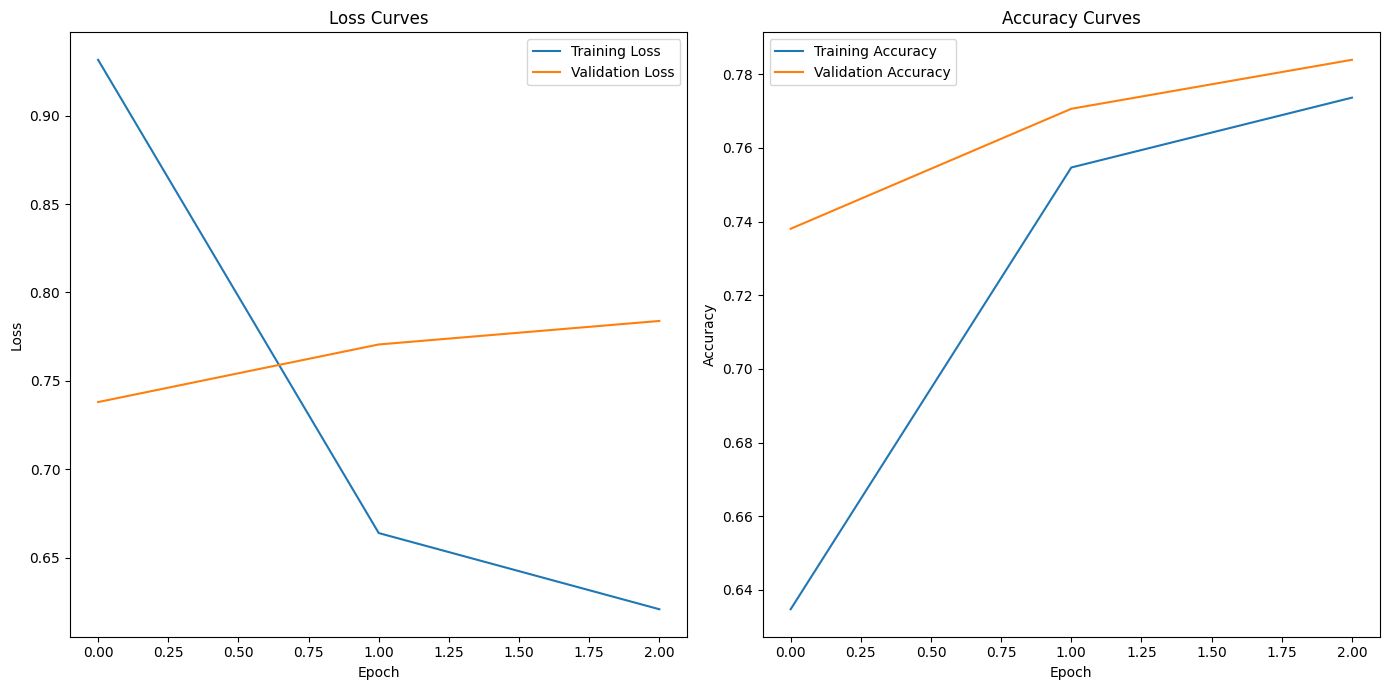

In [85]:
# PLot the losses curves of model_1
def plot_loss_curve(history):
    loss = history.history["loss"]
    val_loss = history.history["val_accuracy"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epoch = range(len(history.history["loss"]))

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epoch, loss, label="Training Loss")
    plt.plot(epoch, val_loss, label="Validation Loss")
    plt.title("Loss Curves")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(epoch, accuracy, label="Training Accuracy")
    plt.plot(epoch, val_accuracy, label="Validation Accuracy")
    plt.title("Accuracy Curves")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_loss_curve(history=history_model_1)

# Model_2: Feature extraction with pretrained token embedding

Let's go to tensorflow hub and look up our universal sentence encoder (USE), let's use pretrained word embedding from tensorflow hub,
more specifically [USE](https://tfhub.dev/google/universal-sentence-encoder/4).

In [89]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [90]:
# Building model 2
inputs = layers.Input(shape=[], dtype=tf.string)  # TF said make the shape as empty list
pretrained_embedding = tf_hub_embedding_layer(inputs)  #Tokenize text and create embedding for each sequence(512 long vector)
x = layers.Dense(128, activation="relu")(pretrained_embedding)
# Note: you can add more layers here if you wanted to
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.models.Model(inputs, outputs, name="model_2")

# Compile model 2
model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 output_layer (Dense)        (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [91]:
# Fit model_2 to the data
history_model_2 = model_2.fit(
    train_dataset,
    epochs=3,
    steps_per_epoch=int(0.1 * len(train_dataset)),  # 10% of the training batches
    validation_data=validation_dataset,
    validation_steps=int(0.1 * len(validation_dataset))  # validate on 10% of validation dataset
)

Epoch 1/3
562/562 [==============================] - 5s 6ms/step - loss: 0.9189 - accuracy: 0.6472 - val_loss: 0.8001 - val_accuracy: 0.6878
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 0.7712 - accuracy: 0.7007 - val_loss: 0.7590 - val_accuracy: 0.7041
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.7554 - accuracy: 0.7102 - val_loss: 0.7450 - val_accuracy: 0.7111


you can note that the accuracy of model_1 is greater than the accuracy of model_2?
because the pretrained layer in the model_2 has frozen weights, and we fit only 66000 weights on model_2,
but in model_1 we fit the model on 8.3 million weights

In [93]:
model_2_evaluation = model_2.evaluate(validation_dataset)
model_2_evaluation[1], model_1_evaluation[1], model_0_evaluation

945/945 [==============================] - 4s 4ms/step - loss: 0.7456 - accuracy: 0.7121


(0.7120680809020996, 0.7861114740371704, 0.7218323844829869)

In [94]:
# Make predictions on model_2
model_2_pred_probs = model_2.predict(validation_dataset)
model_2_pred_probs

945/945 [==============================] - 4s 4ms/step


array([[0.41803268, 0.3562001 , 0.00220949, 0.21518925, 0.00836855],
       [0.3451035 , 0.4996327 , 0.00405125, 0.14769953, 0.00351303],
       [0.22251743, 0.14156759, 0.01731325, 0.58143514, 0.03716661],
       ...,
       [0.00171845, 0.0064348 , 0.05762466, 0.00114885, 0.9330732 ],
       [0.00362268, 0.04770976, 0.19607456, 0.00162826, 0.75096476],
       [0.1482738 , 0.25238752, 0.5385434 , 0.00485649, 0.05593876]],
      dtype=float32)

In [95]:
# Customize the prediction and evaluate the accuracy
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 3, 2, 4, 2, 2, 4, 4, 1], dtype=int64)>

In [96]:
model_2_result = calculate_results(y_true=validation_label_encoded, y_pred=model_2_preds)
model_2_result

{'accuracy': 71.20680524294983,
 'precision': 0.7133245289975624,
 'recall': 0.7120680524294982,
 'f1': 0.7091687146118562}

# Model_3: Conv1D with character embedding

Previously we've token level embedding, but we'll need to do similar steps for character if we want to use char-level embedding.
in the character embedding every letter or character (not word) will turn into feature vector

In [97]:
# Creating a character level tokenizer
# Which mapping every character in a sequence to some integer
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [106]:
# Make function to split sentences into character
def split_chars(text):
    return " ".join(list(text))  # Turning single sentence into group of character

In [105]:
" ".join(list(train_sentences[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [107]:
#Split sequence-level data into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
validation_chars = [split_chars(sentence) for sentence in validation_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [108]:
# What is the average of character length
char_lens = [len(sentence) for sentence in train_sentences]  #Without split() it will count every letter
mean_char_lens = np.mean(char_lens)
mean_char_lens

149.3662574983337

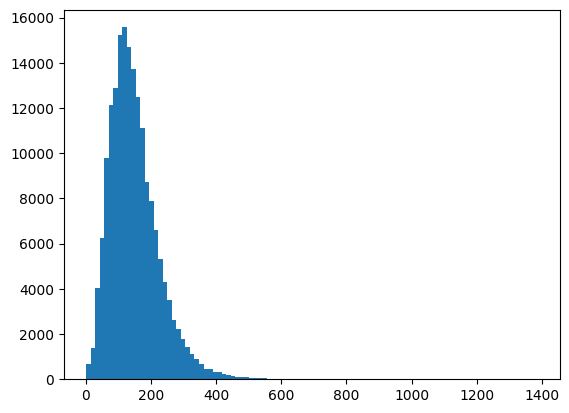

In [111]:
# Checking the distributing of the character length
plt.hist(char_lens, bins=100)
plt.show()

In [110]:
# Finding the maximum length of the characters level
max(char_lens)

1386

In [112]:
# Find what character length covers 95% of sequence
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [113]:
# Get all keyboard characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [115]:
# Create char-level token vectorizer
NUM_CHAR_TOKENS = len(alphabet) + 2  # Add 2 for space and OOV token
char_victorizer = TextVectorization(
    max_tokens=NUM_CHAR_TOKENS,
    output_sequence_length=output_seq_char_len,
    name="char_vectorizer"
)

In [116]:
# Adapt character vectorizer to training character
char_victorizer.adapt(train_chars)

In [117]:
# Check character vocab stats
char_vocab = char_victorizer.get_vocabulary()
print(f"Number of different character in vocab: {len(char_vocab)}")
print(f"Most 5 common character in vocab: {char_vocab[:5]}")
print(f"Most 5 least character in vocab: {char_vocab[-5:]}")

Number of different character in vocab: 28
Most common character in vocab: ['', '[UNK]', 'e', 't', 'i']
most least common 5 words in vocab: ['k', 'x', 'z', 'q', 'j']


In [119]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Text:\n{random_train_chars}")
print(f"\n\nThe length of the text:\n{len(random_train_chars)}")
print(f"\n\nThe text after vectorization:\n{char_victorizer([random_train_chars])}")
print(f"\n\nThe length of the vicorized char:\n{len(char_victorizer(random_train_chars))}")

Text:
m y o f i b r e   c r o s s - s e c t i o n a l   a r e a   w a s   l e s s   a n d   d e n s i t y   w a s   l o w e r   i n   c r i t i c a l l y   i l l   p a t i e n t s   t h a n   i n   h e a l t h y   c o n t r o l s   ,   s i m i l a r l y   w i t h   e a r l y   p n   a n d   l a t e   p n   .


The length of the text:
303


The text after vectorization:
[[15 19  7 17  4 22  8  2 11  8  7  9  9  9  2 11  3  4  7  6  5 12  5  8
   2  5 20  5  9 12  2  9  9  5  6 10 10  2  6  9  4  3 19 20  5  9 12  7
  20  2  8  4  6 11  8  4  3  4 11  5 12 12 19  4 12 12 14  5  3  4  2  6
   3  9  3 13  5  6  4  6 13  2  5 12  3 13 19 11  7  6  3  8  7 12  9  9
   4 15  4 12  5  8 12 19 20  4  3 13  2  5  8 12 19 14  6  5  6 10 12  5
   3  2 14  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  

In [120]:
# Create character-level embedding
char_embed = layers.Embedding(input_dim=len(char_vocab),
                              output_dim=25,  # This is the size of the char embedding in the article
                              mask_zero=True,
                              name="char_embed")

In [121]:
#Test our character embedding layer
print(f"Text:\n{random_train_chars}\n\n")
print(f"Text after victorization:\n{char_victorizer([random_train_chars])}\n\n")
print(f"Embedding:\n{char_embed(char_victorizer([random_train_chars]))}")

Text:
m y o f i b r e   c r o s s - s e c t i o n a l   a r e a   w a s   l e s s   a n d   d e n s i t y   w a s   l o w e r   i n   c r i t i c a l l y   i l l   p a t i e n t s   t h a n   i n   h e a l t h y   c o n t r o l s   ,   s i m i l a r l y   w i t h   e a r l y   p n   a n d   l a t e   p n   .


Text after victorization:
[[15 19  7 17  4 22  8  2 11  8  7  9  9  9  2 11  3  4  7  6  5 12  5  8
   2  5 20  5  9 12  2  9  9  5  6 10 10  2  6  9  4  3 19 20  5  9 12  7
  20  2  8  4  6 11  8  4  3  4 11  5 12 12 19  4 12 12 14  5  3  4  2  6
   3  9  3 13  5  6  4  6 13  2  5 12  3 13 19 11  7  6  3  8  7 12  9  9
   4 15  4 12  5  8 12 19 20  4  3 13  2  5  8 12 19 14  6  5  6 10 12  5
   3  2 14  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [122]:
a = char_embed(char_victorizer(random_train_chars))
a.shape

TensorShape([290, 25])

In [133]:
# Build model_3 , character-level and conv1D
inputs = layers.Input(shape=(1,), dtype=tf.string)
char_victors = char_victorizer(inputs)
char_embedding = char_embed(char_victors)
x = layers.Conv1D(filters=64, kernel_size=5, padding="same", activation=tf.keras.activations.relu)(char_embedding)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_3 = tf.keras.models.Model(inputs, outputs, name="Model_3")

# Compile model_3
model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)

model_3.summary()

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_7 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 output_layer (Dense)        (None, 5)                 325 

In [130]:
# Create char-level dataset
train_chars_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
validation_char_dataset = tf.data.Dataset.from_tensor_slices((validation_chars, validation_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_chars_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [134]:
# Fitting model_3 on chars only
model_3_history = model_3.fit(
    train_chars_dataset,
    epochs=3,
    steps_per_epoch=int(0.1 * len(train_chars_dataset)),
    validation_data=validation_char_dataset,
    validation_steps=int(0.1 * len(validation_char_dataset))
)

Epoch 1/3
562/562 [==============================] - 4s 6ms/step - loss: 1.2545 - accuracy: 0.4854 - val_loss: 1.1162 - val_accuracy: 0.5602
Epoch 2/3
562/562 [==============================] - 3s 6ms/step - loss: 1.0801 - accuracy: 0.5629 - val_loss: 1.0053 - val_accuracy: 0.6024
Epoch 3/3
562/562 [==============================] - 3s 6ms/step - loss: 0.9943 - accuracy: 0.6034 - val_loss: 0.9338 - val_accuracy: 0.6356


First we used global average pooling and we didn't get that accuracy, so we replaced it with global max pool 1D

In [136]:
# Makes prediction on character only
model_3_pred_probs = model_3.predict(validation_char_dataset)
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)

945/945 [==============================] - 2s 2ms/step


In [138]:
# Evaluation the model
model_3_evaluation = model_3.evaluate(validation_char_dataset)
model_3_evaluation[1]

945/945 [==============================] - 2s 2ms/step - loss: 0.9566 - accuracy: 0.6255


0.6254799365997314

In [139]:
model_3_result = calculate_results(validation_label_encoded, model_3_preds)
model_3_result

{'accuracy': 62.5479941745002,
 'precision': 0.6235056430067938,
 'recall': 0.625479941745002,
 'f1': 0.6142988664005529}

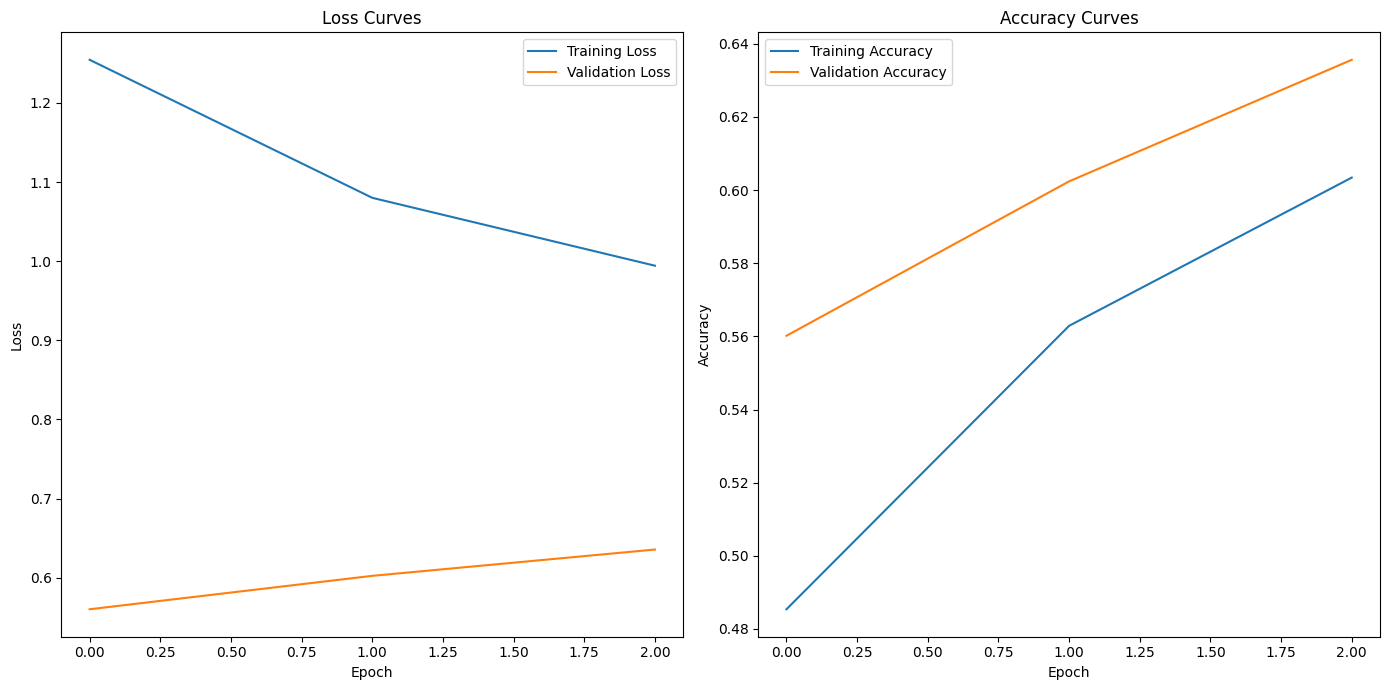

In [140]:
# Plot loss curves
plot_loss_curve(history=model_3_history)

# Model_4: Discussing how to make model take in 2 inputs (character + token)

1. Create a token-level embedding model (similar model_1)
2. create character-level model (similar model_3 with a slight modification)
3. combine 1 & 2 with concatenate(layers.Concatenate())
4. build a series of output layers on top of 3
5. construct a model which takes token and character level as inputs and produce sequence label probabilities as output

In [221]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_victorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Create output layers - adding in Dropout, discussed in section 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [185]:
# Getting the summary of model_4
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

In [179]:
# Plot hybrid token and character model
from keras.utils import plot_model
plot_model(model_4, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [222]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of the paper says they use SGD, you might want to try this
                metrics=["accuracy"])

In [223]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

the zip function in tf.data.Dataset: The input dataset and dataset to be concatenated should have compatible element specs

In [224]:
# Repeat the above steps for our validation data
validation_char_token_data = tf.data.Dataset.from_tensor_slices((validation_sentences, validation_chars)) # make data
validation_char_token_labels = tf.data.Dataset.from_tensor_slices(validation_label_one_hot) # make labels
validation_char_token_dataset = tf.data.Dataset.zip((validation_char_token_data, validation_char_token_labels)) # combine data and labels
val_char_token_dataset = validation_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [183]:
# Checking the dataset to make sure they are prefetched
train_char_token_dataset, validation_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_ZipDataset element_spec=((TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None)), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>)

In [225]:
# Fitting the multi-input (model_4) on tokens and chars
history_model_4 = model_4.fit(train_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=validation_char_token_dataset,
                              validation_steps=int(0.1 * len(validation_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - ETA: 0s - loss: 0.9734 - accuracy: 0.6105

ValueError: in user code:

    File "C:\Users\AZK\miniconda3\lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\AZK\miniconda3\lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        
    File "C:\Users\AZK\miniconda3\lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        str(x[0].shape[0]) + ' samples. '
    File "C:\Users\AZK\miniconda3\lib\site-packages\keras\engine\training.py", line 1788, in test_step
        
    File "C:\Users\AZK\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        
    File "C:\Users\AZK\AppData\Local\Temp\__autograph_generated_fileezsg2rmy.py", line 74, in tf__call
        ag__.if_stmt(ag__.not_(ag__.ld(self)._has_training_argument), if_body_3, else_body_3, get_state_3, set_state_3, ('result', 'training'), 1)
    File "C:\Users\AZK\AppData\Local\Temp\__autograph_generated_fileezsg2rmy.py", line 37, in if_body_3
        result = ag__.converted_call(ag__.ld(f), (), None, fscope)

    ValueError: Exception encountered when calling layer 'universal_sentence_encoder' (type KerasLayer).
    
    in user code:
    
        File "C:\Users\AZK\miniconda3\lib\site-packages\tensorflow_hub\keras_layer.py", line 234, in call  *
            result = f()
    
        ValueError: Shape must be rank 1 but is rank 0 for '{{node text_preprocessor/tokenize/StringSplit/StringSplit}} = StringSplit[skip_empty=true](text_preprocessor/StaticRegexReplace_1, text_preprocessor/tokenize/StringSplit/Const)' with input shapes: [], [].
    
    
    Call arguments received by layer 'universal_sentence_encoder' (type KerasLayer):
      • inputs=tf.Tensor(shape=(), dtype=string)
      • training=False


# Model 5: adding positional embedding via feature engineering

any engineering features used to train a model need to be available at test time, in our case line number and total lines are available

In [193]:
# How many different line numbers are there:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: >

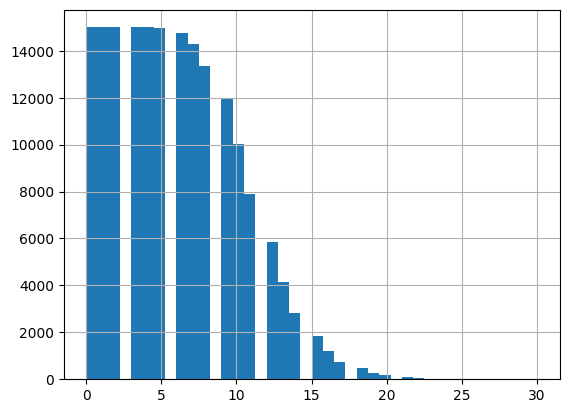

In [197]:
# Checking the distribution of line number column
train_df["line_number"].hist(bins=40)

In [200]:
# Use tensorflow to create one hot encoder tensor of our "line number" column
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15) # encoding to the line 15
validation_line_numbers_one_hot = tf.one_hot(validation_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)
train_line_numbers_one_hot[:10], train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

Now we have encoded our line numbers features, lets do the same for total lines features:

In [201]:
# How many different numbers of lines are there?
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

<Axes: >

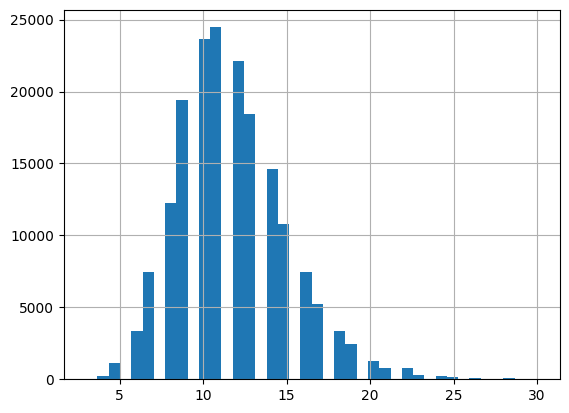

In [202]:
# Check the distribution of the total lines
train_df['total_lines'].hist(bins=40)

the total lines which has the numbers is between 5 to 20

In [204]:
# Check the coverage of a "total lines" value of 20
np.percentile(train_df['total_lines'], 98)

20.0

In [207]:
# Use TensorFlow to create one hot encoded tensors of our "total_lines" feature
train_total_line_one_hot = tf.one_hot(train_df['total_lines'].to_numpy(), depth=20)
validation_total_line_one_hot = tf.one_hot(validation_df['total_lines'].to_numpy(), depth=20)
test_total_line_one_hot = tf.one_hot(test_df['total_lines'].to_numpy(), depth=20)
train_total_line_one_hot[:10]

<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
     

Building a tribrid embedding model
1. create a token-level model
2. create a character model
3. create a model for the "line number" feature
4. create a model for the "total lines " feature
5. combine the outputs of 1 and 2 using tf.keras.layers.concatenate
6. combine the outputs of 3, 4, and 5 using tf.keras.layers.concatenate
7. create an output layer to accept the tribrid embedding and output label probabilities
8. combine the inputs of 1, 2, 3, 4 and the outputs of into a tf.keras.model

In [209]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.models.Model(inputs=token_inputs,
                                    outputs=token_outputs)

# 2. Char inputs
char_inputs = layers.Input(shape=(1, ), dtype=tf.string, name="char_input")
char_vectors = char_victorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line number model
line_number_inputs = layers.Input(shape=(15,), dtype=tf.float32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.models.Model(inputs=line_number_inputs,
                                          outputs=x)

# 4. Total line model
total_line_inputs = layers.Input(shape=(20, ), dtype=tf.float32, name="total_line_inputs")
y = layers.Dense(32, activation="relu")(total_line_inputs)
total_line_model = tf.keras.models.Model(inputs=total_line_inputs,
                                         outputs=y)

# 5. combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="char_token_hybrid_embedding")([token_model.output,
                                                                              char_model.output])

z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embedding with combined token and char embeddings
tribrid_embeddings = layers.Concatenate(name="char_token_positional_embedding")([line_number_model.output,
                                                                                 total_line_model.output,
                                                                                 z])

# 7. Create output layer
output_layer = layers.Dense(num_classes, activation="softmax", name="output_layer")(tribrid_embeddings)

# 8. Put together model with all kinds of inputs
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer,
                         name="model_5_tribrid_embedding_model")

In [210]:
# Get a summary of our tribrid embedding model
model_5.summary()

Model: "model_5_tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['t

In [212]:
# Plot model_5 to explore it visually...
from keras.utils import plot_model
plot_model(model_5, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


What is label smoothing?

For example, if our model gets too confident on a single class (e.g. its prediction probability is really high), it may get stuck on that class and not consider other classes...
Really confident: [0.0, 0.0, 1.0, 0.0, 0.0]
What label smoothing does is it assigns some of the value from the highest pred prob to other classes, in turn, hopefully improving generalization: [0.01, 0.01, 0.96, 0.01, 0.01]

In [216]:
# Compile token, char, and positional embedding model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # helps to prevent overfitting
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [213]:
# Create training and valiadation datasets (with all four kinds of input data)
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                                train_total_line_one_hot,
                                                                train_sentences,
                                                                train_chars))
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data, train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Do the same as above but for the validation dataset
val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((validation_line_numbers_one_hot,
                                                              validation_total_line_one_hot,
                                                              validation_sentences,
                                                              validation_chars))
validation_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(validation_label_one_hot)
validation_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data, validation_char_token_pos_labels))
validation_char_token_pos_dataset = validation_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [214]:
# Check input shapes
train_char_token_pos_dataset, validation_char_token_pos_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [217]:
# Fit our tribrid embedding model
history_model_5 = model_5.fit(train_char_token_pos_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_token_pos_dataset)),
                              epochs=3,
                              validation_data=validation_char_token_pos_dataset,
                              validation_steps=int(0.1 * len(validation_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 41s 62ms/step - loss: 1.0962 - accuracy: 0.7240 - val_loss: 0.9846 - val_accuracy: 0.8039
Epoch 2/3
562/562 [==============================] - 35s 61ms/step - loss: 0.9693 - accuracy: 0.8143 - val_loss: 0.9505 - val_accuracy: 0.8271
Epoch 3/3
562/562 [==============================] - 35s 62ms/step - loss: 0.9505 - accuracy: 0.8232 - val_loss: 0.9375 - val_accuracy: 0.8351


In [218]:
# Make predictions with the char token pos model
model_5_pred_probs = model_5.predict(validation_char_token_pos_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 16s 15ms/step


array([[0.5035798 , 0.09904554, 0.0157188 , 0.36153483, 0.02012099],
       [0.5520184 , 0.10262479, 0.05475472, 0.28095132, 0.00965081],
       [0.33126342, 0.12567243, 0.13600203, 0.35137576, 0.05568631],
       ...,
       [0.03368316, 0.09720527, 0.03757211, 0.03191703, 0.79962236],
       [0.03055936, 0.2679175 , 0.0786298 , 0.02457468, 0.59831864],
       [0.25512227, 0.5638777 , 0.08606636, 0.03803968, 0.05689396]],
      dtype=float32)

In [219]:
# Convert pred probs to pred labels
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1], dtype=int64)>

In [220]:
# Calculate results of char token pos model
model_5_result = calculate_results(y_true=validation_label_encoded,
                                    y_pred=model_5_preds)
model_5_result

{'accuracy': 83.45359459817291,
 'precision': 0.8338643176209546,
 'recall': 0.8345359459817291,
 'f1': 0.8328403825191537}

 # Comparing all the models resutls

In [236]:
# Combine model results into a dataframe
all_model_results = pd.DataFrame({"model_0_baseline": baseline_result,
                                  "model_1_custom_token_embedding": model_1_result,
                                  "model_2_pretrained_token_embedding": model_2_result,
                                  "model_3_custom_char_embedding": model_3_result,
                                  "model_5_pos_char_token_embedding": model_5_result})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custom_token_embedding,78.611148,0.782223,0.786111,0.783383
model_2_pretrained_token_embedding,71.206805,0.713325,0.712068,0.709169
model_3_custom_char_embedding,62.547994,0.623506,0.625480,0.614299
model_5_pos_char_token_embedding,83.453595,0.833864,0.834536,0.832840


In [239]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

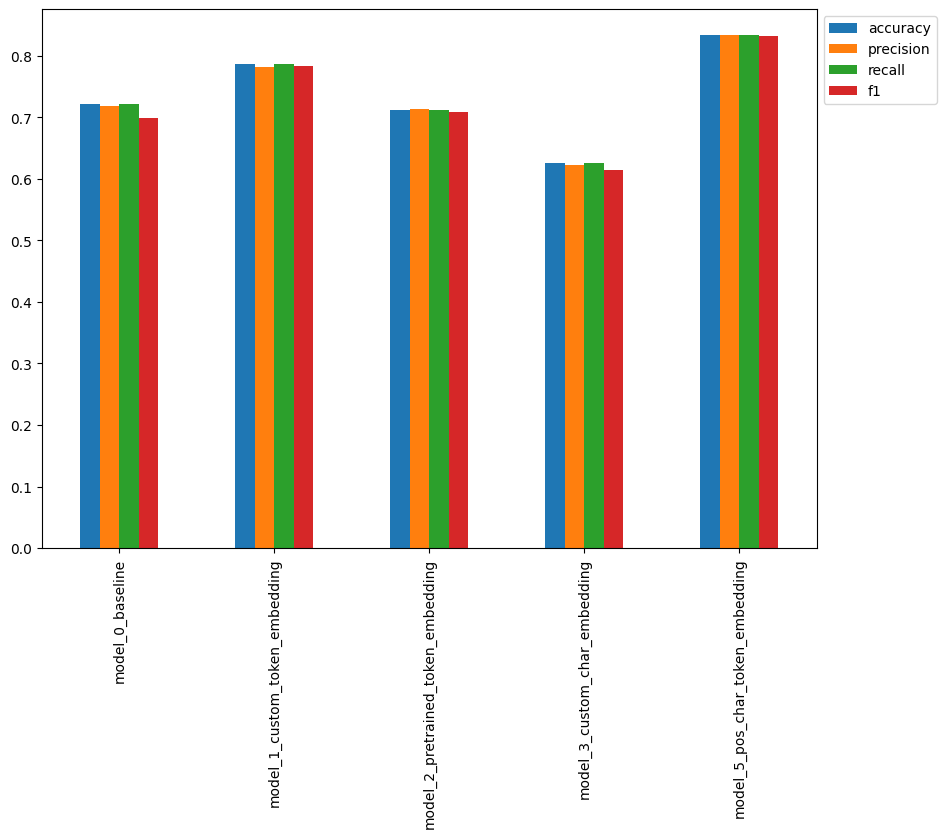

In [240]:
# Plot and compare all model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

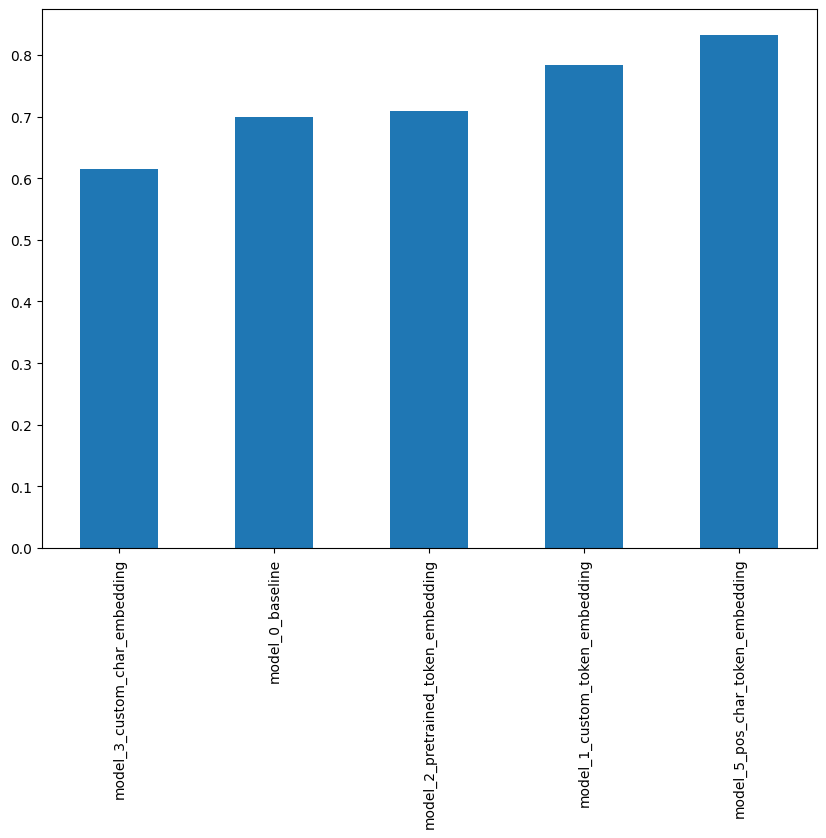

In [241]:
# Sort models results by f1-score
all_model_results.sort_values("f1", ascending=True)["f1"].plot(kind="bar", figsize=(10, 7));

# Save and load the model

In [242]:
# Save the best performing model to SavedModel format (default)
model_5.save("skimlit_tribrid_model")

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001CD850F1360>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001CD850F1360>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001CD850F1360>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: skimlit_tribrid_model\assets


INFO:tensorflow:Assets written to: skimlit_tribrid_model\assets


In [243]:
# Load in best performing model
loaded_model = tf.keras.models.load_model("skimlit_tribrid_model")

In [245]:
# Make predictions with the loaded moel on the validation set
loaded_pred_probs = loaded_model.predict(validation_char_token_pos_dataset)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

945/945 [==============================] - 17s 17ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1], dtype=int64)>

In [246]:
# Calculate the results of our loaded model
loaded_model_results = calculate_results(y_true=validation_label_encoded,
                                         y_pred=loaded_preds)
loaded_model_results

{'accuracy': 83.46021448431087,
 'precision': 0.8335791676399028,
 'recall': 0.8346021448431087,
 'f1': 0.8331956440574152}